Dataset Overview¶
The dataset provides a comprehensive overview of online sales transactions across various product categories from a popular marketplace.
Each transaction is detailed with information such as the order ID, date, category, product name, quantity sold, unit price, total price, 
region, and payment method. This rich dataset allows for an in-depth analysis of sales trends, product performance, and customer preferences.

Objective
• The primary objectives of this analysis are to:
• Identify sales trends over time to uncover seasonal patterns or growth opportunities.
• Explore the popularity of different product categories across various regions.
• Investigate the impact of payment methods on sales volume and revenue.
• Identify top-selling products within each category to inform inventory and marketing strategies.
• Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns and improve regional sales strategies.

Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')


Load the Dataset

In [2]:
dataset = pd.read_csv("Online Sales Data.csv",encoding = 'unicode_escape')

In [3]:
dataset.shape

(240, 9)

In [4]:
dataset.head(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card


In [6]:
dataset.tail(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


Initital Data Overview

In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [14]:
dataset.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

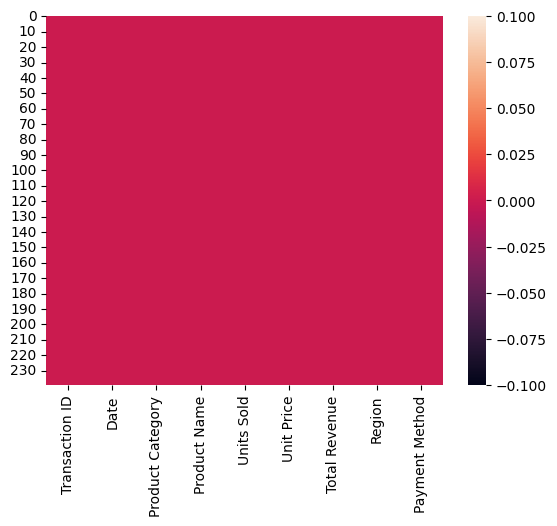

In [16]:
sns.heatmap(dataset.isnull())
plt.show()

In [17]:
dataset.duplicated().sum()

0

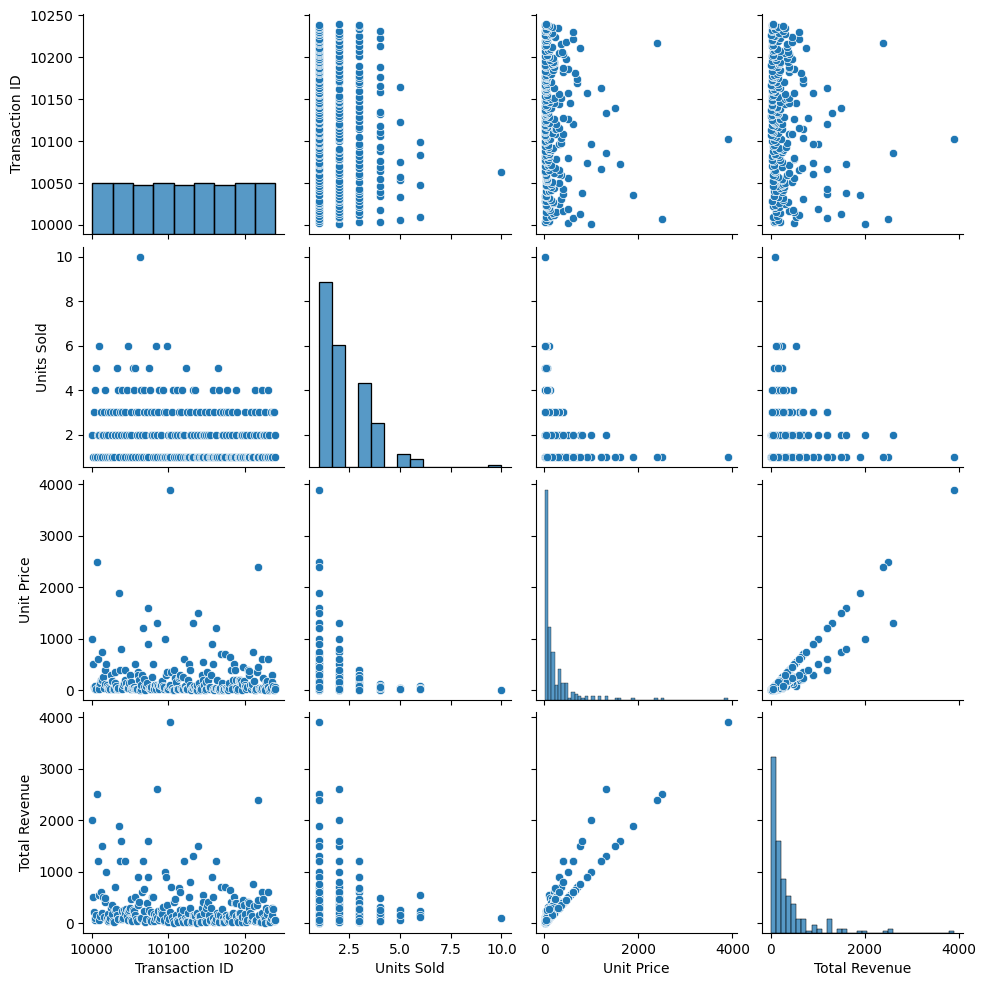

In [18]:
sns.pairplot(dataset)

EXPLORATORY DATA ANALYSIS

Univariate Analysis

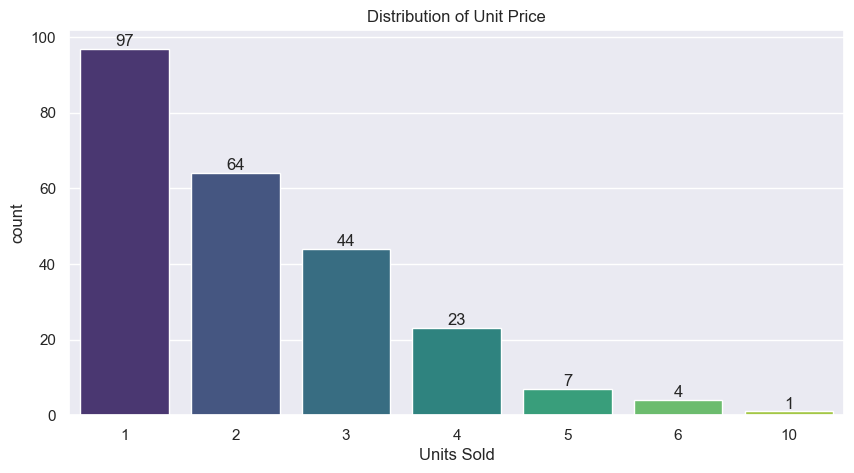

In [26]:
sns.set(rc = {'figure.figsize': (10,5)})
ax = sns.countplot(x = "Units Sold", data = dataset, palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Unit Price")
plt.show()

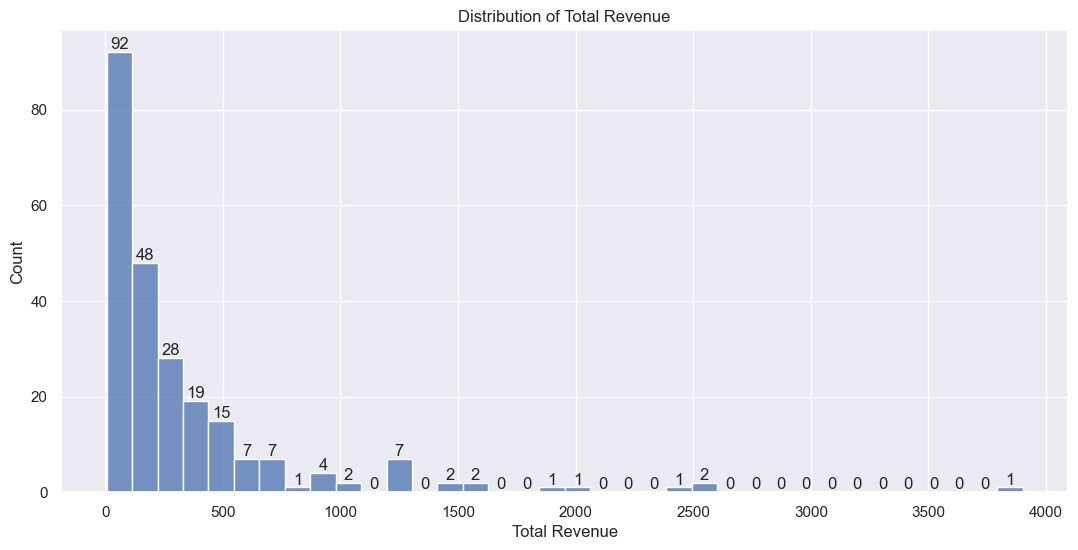

In [37]:
sns.set(rc = {'figure.figsize': (13,6)})
ax = sns.histplot(x = "Total Revenue", data = dataset, palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Total Revenue")
plt.show()

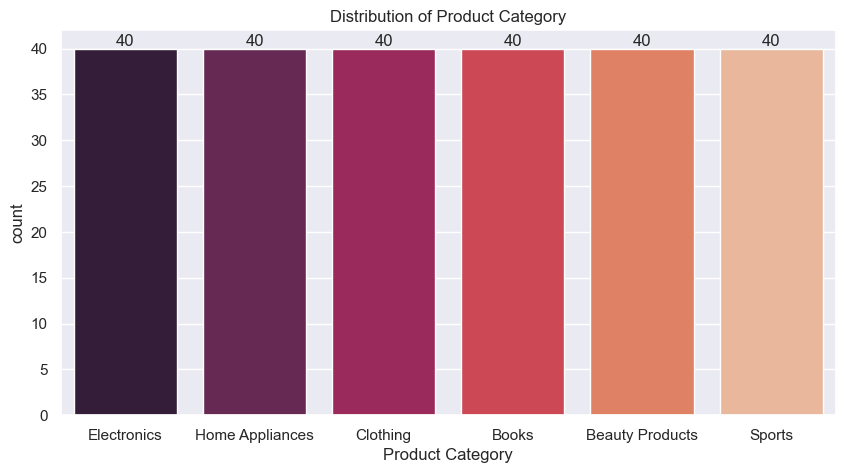

In [46]:
sns.set(rc = {'figure.figsize': (10,5)})
ax = sns.countplot(x = 'Product Category', data = dataset, palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Product Category")
plt.show()

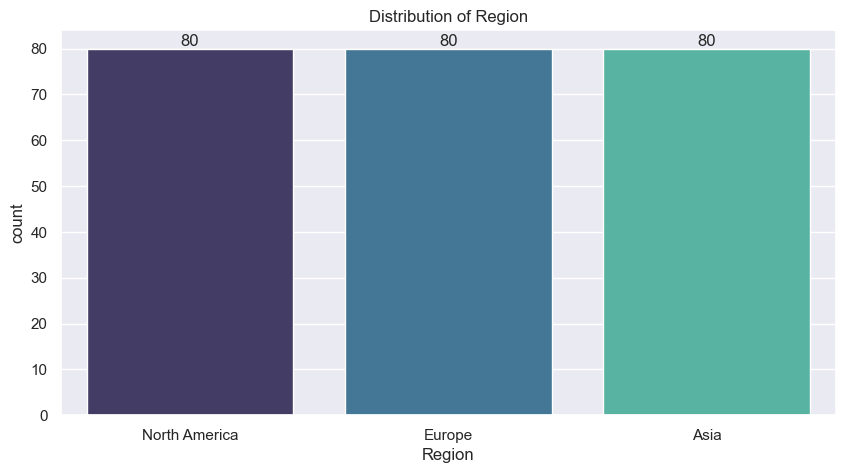

In [48]:
sns.set(rc = {'figure.figsize': (10,5)})
ax = sns.countplot(x = 'Region', data = dataset, palette = 'mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Region")
plt.show()

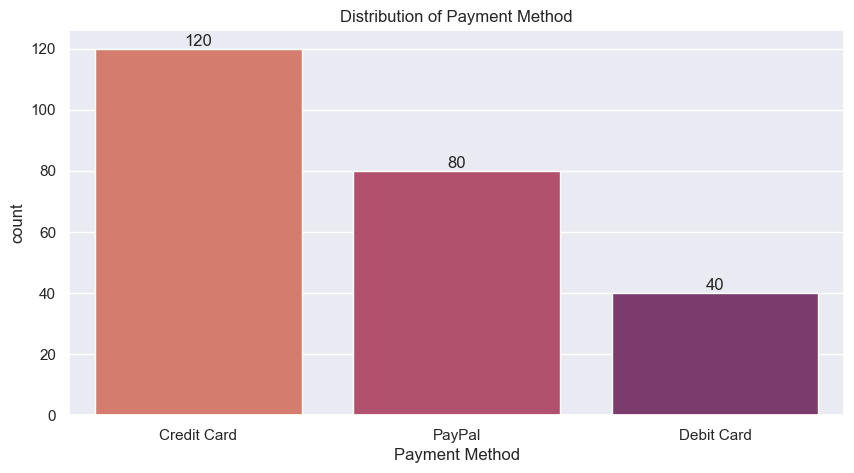

In [49]:
sns.set(rc = {'figure.figsize': (10,5)})
ax = sns.countplot(x = 'Payment Method', data = dataset, palette = 'flare')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Payment Method")
plt.show()

Bivariate Analysis

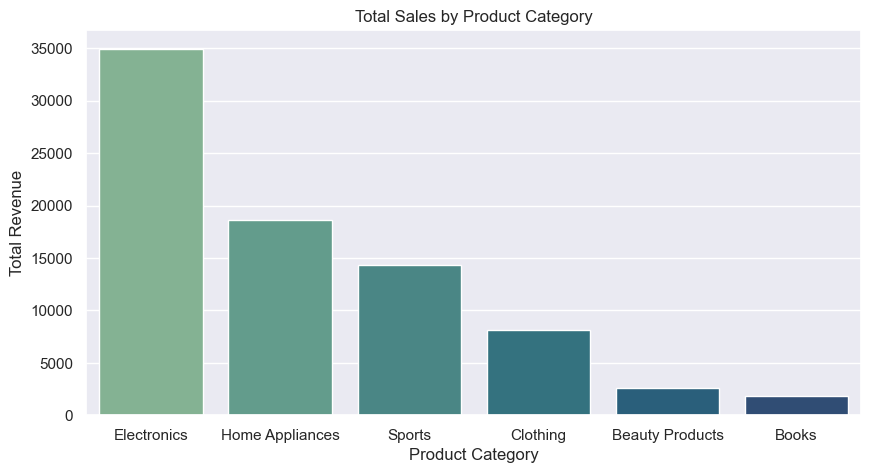

In [55]:
sns.set(rc = {'figure.figsize': (10,5)})
category_sales = dataset.groupby(['Product Category'],as_index = False)['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False)
sns.barplot(x = 'Product Category', y = 'Total Revenue', data = category_sales, palette = 'crest')
plt.title("Total Sales by Product Category")
plt.show()

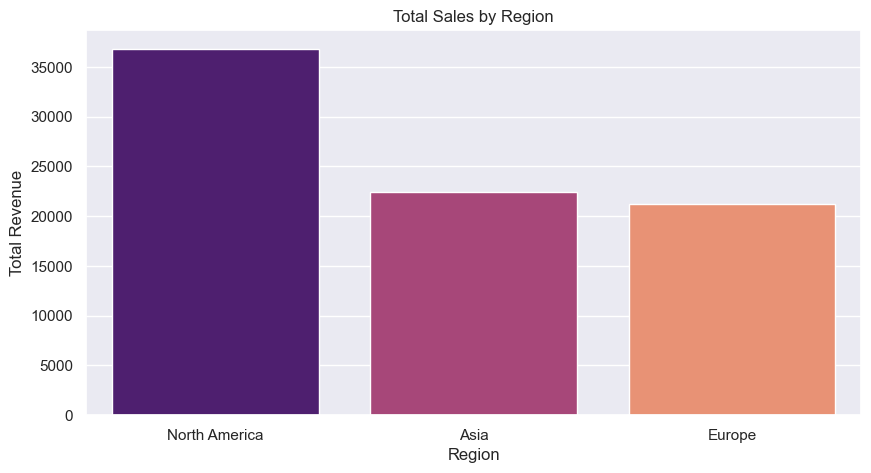

In [57]:
Region_Sales = dataset.groupby(['Region'],as_index = False)['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False )
sns.barplot(x = 'Region', y = 'Total Revenue', data = Region_Sales, palette = 'magma')
plt.title("Total Sales by Region")
plt.show()

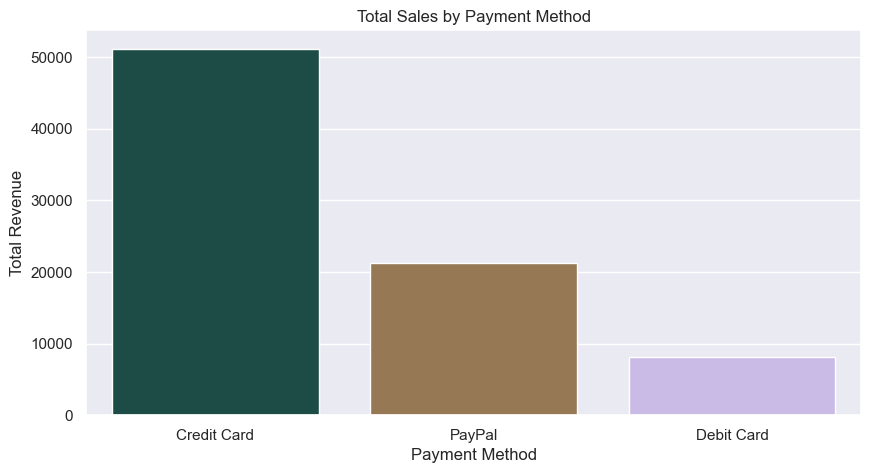

In [61]:
Payment_Sales = dataset.groupby(['Payment Method'],as_index = False)['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False )
sns.barplot(x = 'Payment Method', y = 'Total Revenue', data = Payment_Sales, palette = 'cubehelix')
plt.title("Total Sales by Payment Method")
plt.show()

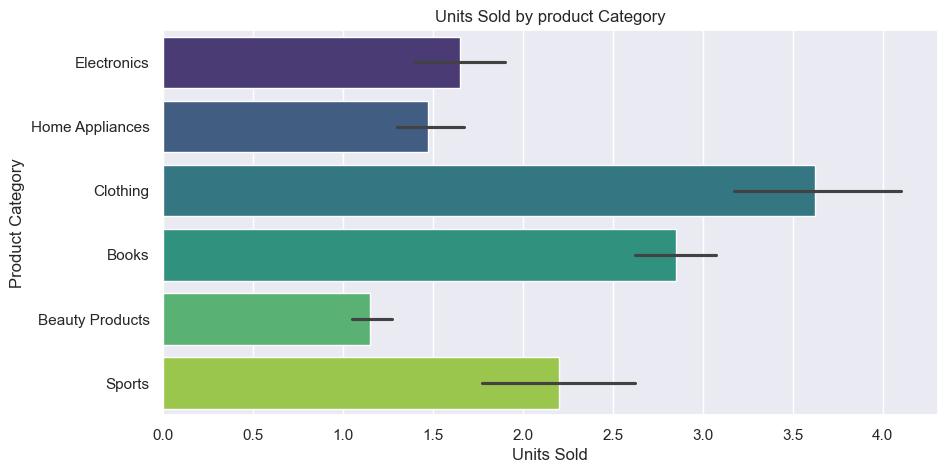

In [64]:
sns.barplot(x = 'Units Sold', y = 'Product Category', data = dataset, palette = 'viridis')
plt.title("Units Sold by product Category")
plt.show()

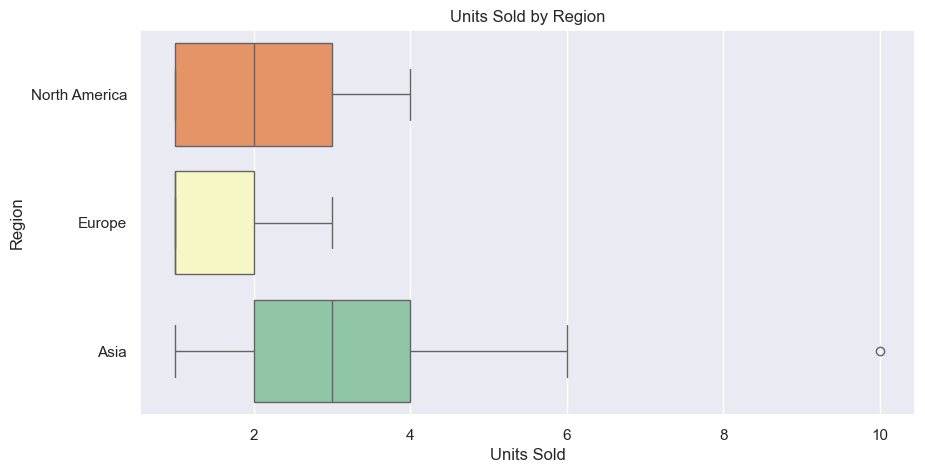

In [71]:
sns.boxplot(x = 'Units Sold', y = 'Region', data = dataset, palette = 'Spectral')
plt.title("Units Sold by Region")
plt.show()

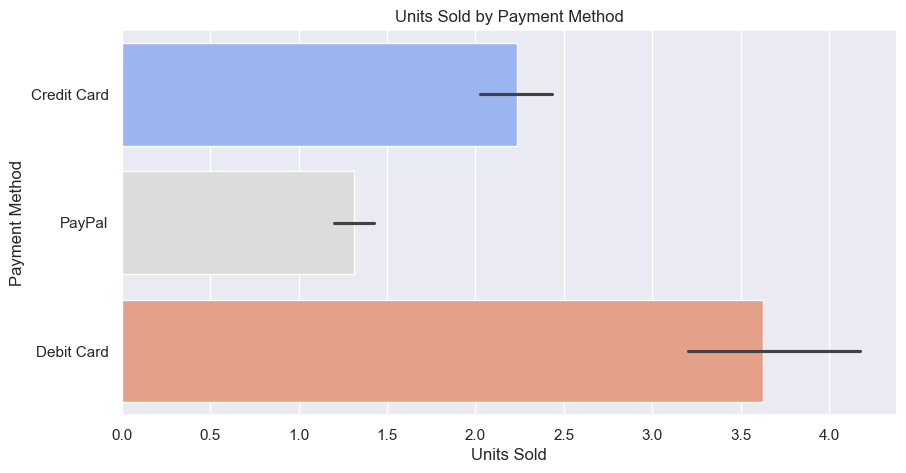

In [73]:
sns.barplot(x = 'Units Sold', y = 'Payment Method', data = dataset, palette = 'coolwarm')
plt.title("Units Sold by Payment Method")
plt.show()

Product Level Analysis

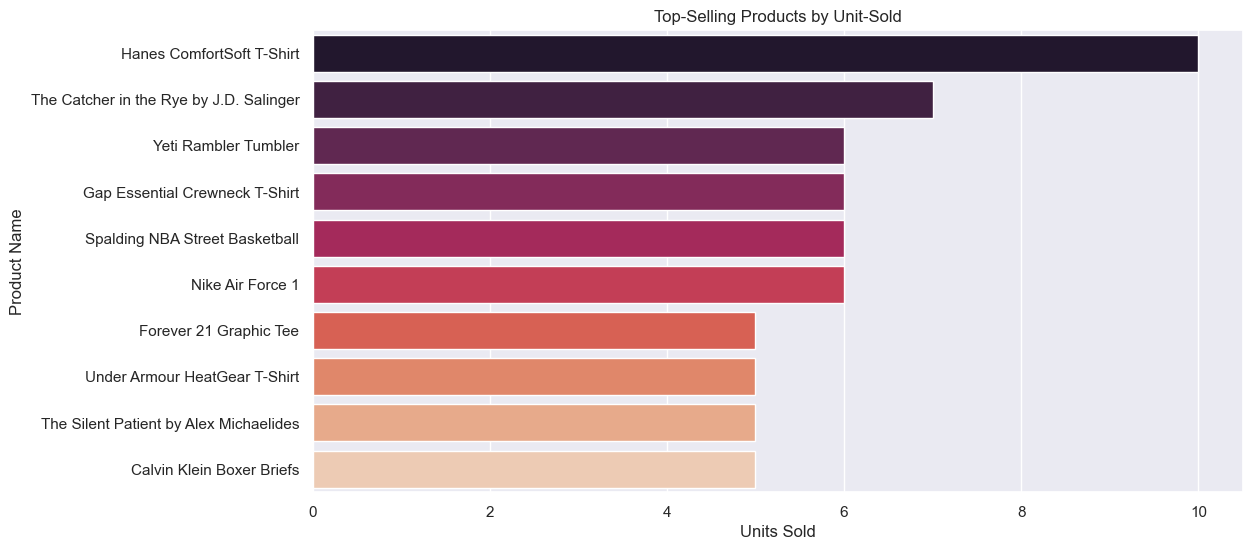

In [88]:
product_units_sold = dataset.groupby('Product Name')['Units Sold'].sum().reset_index()
top_products_units_sold = product_units_sold.sort_values(by='Units Sold', ascending=False).head(10)

sns.barplot(x = 'Units Sold', y = 'Product Name', data = top_products_units_sold, palette = 'rocket')
plt.title("Top-Selling Products by Unit-Sold")
plt.show()

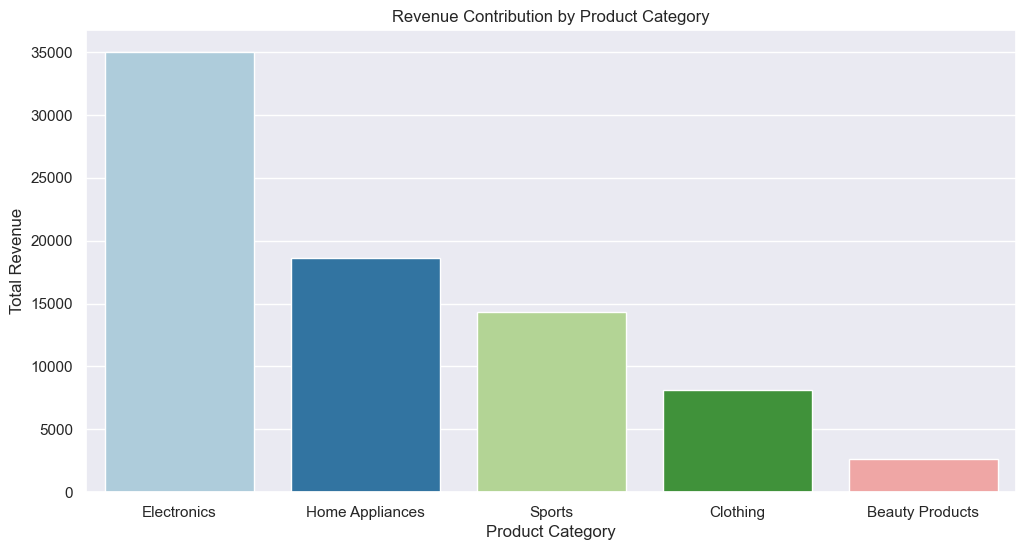

In [91]:
sns.set(rc = {'figure.figsize':(12,6)})
Category_Sales = dataset.groupby(['Product Category'],as_index = False)['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False).head(5)
sns.barplot(x = 'Product Category', y = 'Total Revenue', data = Category_Sales, palette = 'Paired')
plt.title("Revenue Contribution by Product Category")
plt.show()

Regional Analysis

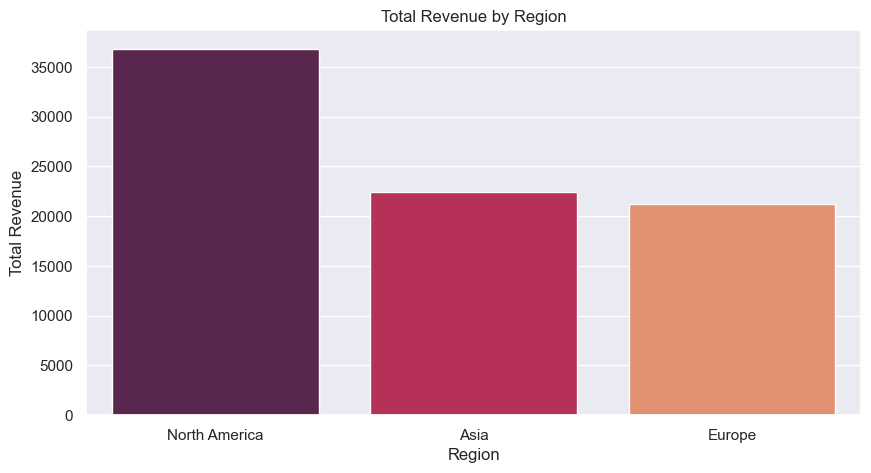

In [98]:
sns.set(rc = {'figure.figsize':(10,5)})
Region_Sales = dataset.groupby(['Region'],as_index = False)['Total Revenue'].sum().sort_values(by = 'Total Revenue', ascending = False).head(5)
sns.barplot(x = 'Region', y = 'Total Revenue', data = Region_Sales, palette = 'rocket')
plt.title("Total Revenue by Region")
plt.show()

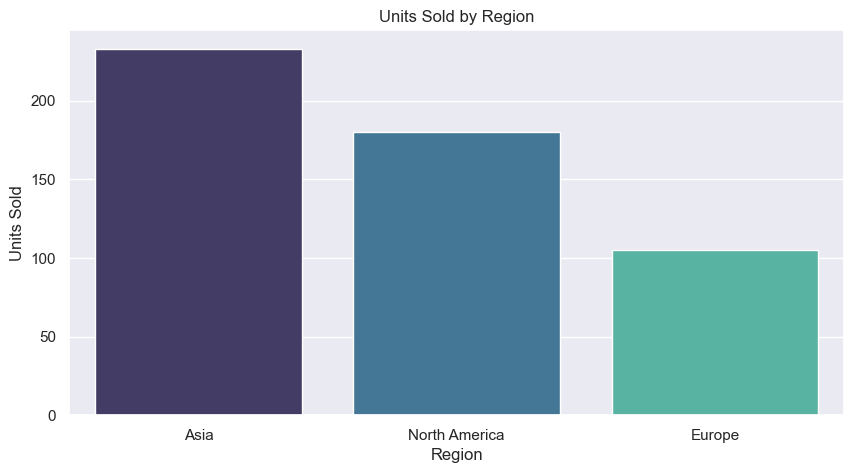

In [96]:
sns.set(rc = {'figure.figsize':(10,5)})
Region_Units = dataset.groupby(['Region'],as_index = False)['Units Sold'].sum().sort_values(by = 'Units Sold', ascending = False).head(5)
sns.barplot(x = 'Region', y = 'Units Sold', data = Region_Units, palette = 'mako')
plt.title("Units Sold by Region")
plt.show()

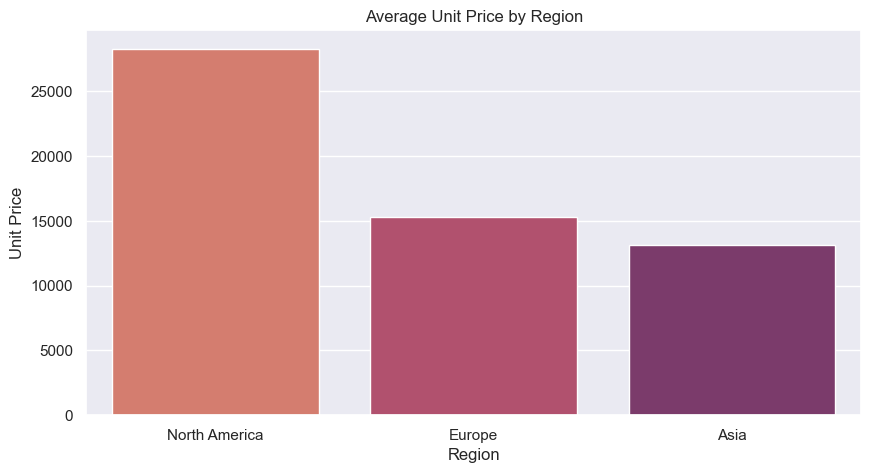

In [101]:
sns.set(rc = {'figure.figsize':(10,5)})
Region_avg_price = dataset.groupby(['Region'],as_index = False)['Unit Price'].sum().sort_values(by = 'Unit Price', ascending = False).head(5)
sns.barplot(x = 'Region', y = 'Unit Price', data = Region_avg_price, palette = 'flare')
plt.title("Average Unit Price by Region")
plt.show()